# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [56]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [57]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [58]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [59]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('loss: ', loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

loss:  1.30378789133
Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [60]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 3.865070e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


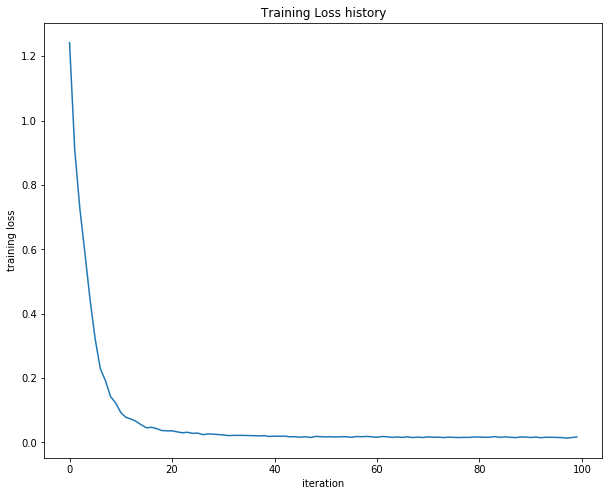

In [61]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [62]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [63]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

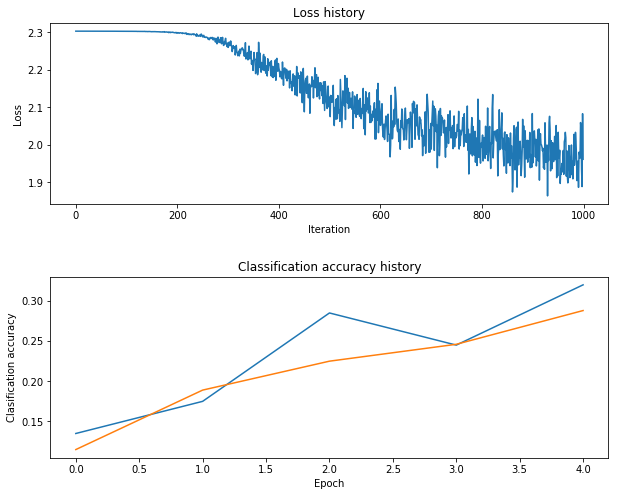

In [64]:
# Plot the loss function and train / validation accuracies
plt.subplots_adjust(hspace=0.4)
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

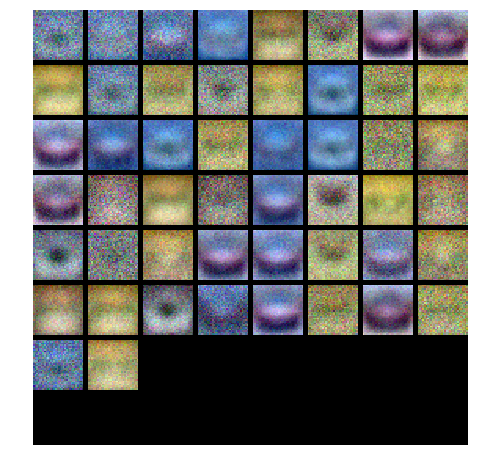

In [46]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [52]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
import itertools

learning_rates = [1e-3, 1.5e-3]
regularization_strengths = [.175, .25, .5]
batch_sizes = [200, 300, 400]
number_iterations = [1000, 1500, 2000]
hidden_sizes = [50, 75, 100]

input_size = 32 * 32 * 3
num_classes = 10

results = {}   # map of hyper-parameter values
best_val = -1  # the best validation accuracy

for [lr, rs, bs, ni, hs] in itertools.product(learning_rates, regularization_strengths, batch_sizes, number_iterations
                                             , hidden_sizes):
    
    net = TwoLayerNet(input_size, hs, num_classes)
                                              
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=ni, batch_size=bs,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=rs, verbose=True)
    
    # Predict on the training set
    training_accuracy = (net.predict(X_train) == y_train).mean()
    
    # Predict on the validation set
    validation_accuracy = (net.predict(X_val) == y_val).mean() 
    
    print('lr %e rs %f bs %d ni %d hs %d train accuracy %f val accuracy %f' % (lr, rs, bs, ni, hs, 
                                                                                         training_accuracy,
                                                                                         validation_accuracy))                                         
   
    results[(lr, rs, bs, ni, hs)] = (training_accuracy, validation_accuracy) 
    
    if (validation_accuracy > best_val):
        best_val = validation_accuracy
        best_net = net
    
# Print out results.
for lr, rs, bs, ni, hs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, rs, bs, ni, hs)]
    print('lr %e rs %f bs %d ni %d hs %d train accuracy: %f val accuracy: %f' % (
                lr, rs, bs, ni, hs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1000: loss 2.302876
iteration 100 / 1000: loss 1.901238
iteration 200 / 1000: loss 1.744360
iteration 300 / 1000: loss 1.611569
iteration 400 / 1000: loss 1.587698
iteration 500 / 1000: loss 1.518606
iteration 600 / 1000: loss 1.564793
iteration 700 / 1000: loss 1.546016
iteration 800 / 1000: loss 1.462350
iteration 900 / 1000: loss 1.479945
lr 1.000000e-03 rs 0.175000 bs 200 ni 1000 hs 50 train accuracy 0.492347 val accuracy 0.461000
iteration 0 / 1000: loss 2.302969
iteration 100 / 1000: loss 1.889808
iteration 200 / 1000: loss 1.732051
iteration 300 / 1000: loss 1.611586
iteration 400 / 1000: loss 1.545296
iteration 500 / 1000: loss 1.546668
iteration 600 / 1000: loss 1.514942
iteration 700 / 1000: loss 1.651485
iteration 800 / 1000: loss 1.518653
iteration 900 / 1000: loss 1.487214
lr 1.000000e-03 rs 0.175000 bs 200 ni 1000 hs 75 train accuracy 0.491265 val accuracy 0.471000
iteration 0 / 1000: loss 2.303097
iteration 100 / 1000: loss 1.890877
iteration 200 / 1000: lo

iteration 1300 / 1500: loss 1.505887
iteration 1400 / 1500: loss 1.466065
lr 1.000000e-03 rs 0.175000 bs 300 ni 1500 hs 75 train accuracy 0.521265 val accuracy 0.483000
iteration 0 / 1500: loss 2.303127
iteration 100 / 1500: loss 1.946861
iteration 200 / 1500: loss 1.857108
iteration 300 / 1500: loss 1.664824
iteration 400 / 1500: loss 1.594732
iteration 500 / 1500: loss 1.574345
iteration 600 / 1500: loss 1.636387
iteration 700 / 1500: loss 1.419156
iteration 800 / 1500: loss 1.441852
iteration 900 / 1500: loss 1.504432
iteration 1000 / 1500: loss 1.441754
iteration 1100 / 1500: loss 1.355154
iteration 1200 / 1500: loss 1.321649
iteration 1300 / 1500: loss 1.465598
iteration 1400 / 1500: loss 1.328256
lr 1.000000e-03 rs 0.175000 bs 300 ni 1500 hs 100 train accuracy 0.532449 val accuracy 0.489000
iteration 0 / 2000: loss 2.302840
iteration 100 / 2000: loss 1.892803
iteration 200 / 2000: loss 1.830277
iteration 300 / 2000: loss 1.684819
iteration 400 / 2000: loss 1.686687
iteration 500 

iteration 100 / 2000: loss 1.945160
iteration 200 / 2000: loss 1.734764
iteration 300 / 2000: loss 1.667026
iteration 400 / 2000: loss 1.601796
iteration 500 / 2000: loss 1.534746
iteration 600 / 2000: loss 1.543621
iteration 700 / 2000: loss 1.436944
iteration 800 / 2000: loss 1.468287
iteration 900 / 2000: loss 1.445599
iteration 1000 / 2000: loss 1.365445
iteration 1100 / 2000: loss 1.402101
iteration 1200 / 2000: loss 1.395388
iteration 1300 / 2000: loss 1.423679
iteration 1400 / 2000: loss 1.293704
iteration 1500 / 2000: loss 1.495272
iteration 1600 / 2000: loss 1.302007
iteration 1700 / 2000: loss 1.272995
iteration 1800 / 2000: loss 1.328237
iteration 1900 / 2000: loss 1.279415
lr 1.000000e-03 rs 0.175000 bs 400 ni 2000 hs 100 train accuracy 0.568959 val accuracy 0.504000
iteration 0 / 1000: loss 2.302948
iteration 100 / 1000: loss 2.008812
iteration 200 / 1000: loss 1.720236
iteration 300 / 1000: loss 1.741537
iteration 400 / 1000: loss 1.643241
iteration 500 / 1000: loss 1.605

iteration 900 / 1500: loss 1.517320
iteration 1000 / 1500: loss 1.433643
iteration 1100 / 1500: loss 1.412796
iteration 1200 / 1500: loss 1.487883
iteration 1300 / 1500: loss 1.557232
iteration 1400 / 1500: loss 1.539656
lr 1.000000e-03 rs 0.250000 bs 300 ni 1500 hs 50 train accuracy 0.519980 val accuracy 0.491000
iteration 0 / 1500: loss 2.303198
iteration 100 / 1500: loss 1.901130
iteration 200 / 1500: loss 1.674156
iteration 300 / 1500: loss 1.747363
iteration 400 / 1500: loss 1.648679
iteration 500 / 1500: loss 1.560730
iteration 600 / 1500: loss 1.519145
iteration 700 / 1500: loss 1.544371
iteration 800 / 1500: loss 1.503580
iteration 900 / 1500: loss 1.553439
iteration 1000 / 1500: loss 1.502193
iteration 1100 / 1500: loss 1.423830
iteration 1200 / 1500: loss 1.520579
iteration 1300 / 1500: loss 1.457985
iteration 1400 / 1500: loss 1.438458
lr 1.000000e-03 rs 0.250000 bs 300 ni 1500 hs 75 train accuracy 0.518796 val accuracy 0.510000
iteration 0 / 1500: loss 2.303364
iteration 10

iteration 100 / 2000: loss 1.946676
iteration 200 / 2000: loss 1.720432
iteration 300 / 2000: loss 1.664491
iteration 400 / 2000: loss 1.626837
iteration 500 / 2000: loss 1.484718
iteration 600 / 2000: loss 1.625279
iteration 700 / 2000: loss 1.559798
iteration 800 / 2000: loss 1.481469
iteration 900 / 2000: loss 1.514724
iteration 1000 / 2000: loss 1.469184
iteration 1100 / 2000: loss 1.427507
iteration 1200 / 2000: loss 1.466213
iteration 1300 / 2000: loss 1.408292
iteration 1400 / 2000: loss 1.445986
iteration 1500 / 2000: loss 1.451988
iteration 1600 / 2000: loss 1.412522
iteration 1700 / 2000: loss 1.478590
iteration 1800 / 2000: loss 1.378217
iteration 1900 / 2000: loss 1.401513
lr 1.000000e-03 rs 0.250000 bs 400 ni 2000 hs 75 train accuracy 0.553408 val accuracy 0.511000
iteration 0 / 2000: loss 2.303376
iteration 100 / 2000: loss 2.019845
iteration 200 / 2000: loss 1.763562
iteration 300 / 2000: loss 1.705067
iteration 400 / 2000: loss 1.598988
iteration 500 / 2000: loss 1.6557

iteration 100 / 1000: loss 1.928565
iteration 200 / 1000: loss 1.796277
iteration 300 / 1000: loss 1.711647
iteration 400 / 1000: loss 1.675872
iteration 500 / 1000: loss 1.502378
iteration 600 / 1000: loss 1.657534
iteration 700 / 1000: loss 1.501862
iteration 800 / 1000: loss 1.585376
iteration 900 / 1000: loss 1.615686
lr 1.000000e-03 rs 0.500000 bs 300 ni 1000 hs 100 train accuracy 0.494204 val accuracy 0.472000
iteration 0 / 1500: loss 2.303324
iteration 100 / 1500: loss 1.986669
iteration 200 / 1500: loss 1.770204
iteration 300 / 1500: loss 1.670147
iteration 400 / 1500: loss 1.601711
iteration 500 / 1500: loss 1.682710
iteration 600 / 1500: loss 1.610769
iteration 700 / 1500: loss 1.549802
iteration 800 / 1500: loss 1.597512
iteration 900 / 1500: loss 1.511959
iteration 1000 / 1500: loss 1.582073
iteration 1100 / 1500: loss 1.491343
iteration 1200 / 1500: loss 1.499334
iteration 1300 / 1500: loss 1.622685
iteration 1400 / 1500: loss 1.481332
lr 1.000000e-03 rs 0.500000 bs 300 ni

iteration 400 / 2000: loss 1.665469
iteration 500 / 2000: loss 1.681545
iteration 600 / 2000: loss 1.494569
iteration 700 / 2000: loss 1.599692
iteration 800 / 2000: loss 1.565304
iteration 900 / 2000: loss 1.565485
iteration 1000 / 2000: loss 1.481264
iteration 1100 / 2000: loss 1.540933
iteration 1200 / 2000: loss 1.501754
iteration 1300 / 2000: loss 1.504320
iteration 1400 / 2000: loss 1.621217
iteration 1500 / 2000: loss 1.563904
iteration 1600 / 2000: loss 1.430382
iteration 1700 / 2000: loss 1.560863
iteration 1800 / 2000: loss 1.566494
iteration 1900 / 2000: loss 1.599000
lr 1.000000e-03 rs 0.500000 bs 400 ni 2000 hs 50 train accuracy 0.521347 val accuracy 0.491000
iteration 0 / 2000: loss 2.303747
iteration 100 / 2000: loss 1.930922
iteration 200 / 2000: loss 1.745653
iteration 300 / 2000: loss 1.771757
iteration 400 / 2000: loss 1.746980
iteration 500 / 2000: loss 1.656445
iteration 600 / 2000: loss 1.625265
iteration 700 / 2000: loss 1.548223
iteration 800 / 2000: loss 1.5851

iteration 400 / 1000: loss 1.623171
iteration 500 / 1000: loss 1.627499
iteration 600 / 1000: loss 1.528033
iteration 700 / 1000: loss 1.564270
iteration 800 / 1000: loss 1.528854
iteration 900 / 1000: loss 1.409795
lr 1.500000e-03 rs 0.175000 bs 300 ni 1000 hs 50 train accuracy 0.508163 val accuracy 0.499000
iteration 0 / 1000: loss 2.302986
iteration 100 / 1000: loss 1.860704
iteration 200 / 1000: loss 1.646653
iteration 300 / 1000: loss 1.707849
iteration 400 / 1000: loss 1.552247
iteration 500 / 1000: loss 1.582073
iteration 600 / 1000: loss 1.583829
iteration 700 / 1000: loss 1.464963
iteration 800 / 1000: loss 1.406362
iteration 900 / 1000: loss 1.441024
lr 1.500000e-03 rs 0.175000 bs 300 ni 1000 hs 75 train accuracy 0.514673 val accuracy 0.478000
iteration 0 / 1000: loss 2.303124
iteration 100 / 1000: loss 1.850341
iteration 200 / 1000: loss 1.707584
iteration 300 / 1000: loss 1.537343
iteration 400 / 1000: loss 1.524828
iteration 500 / 1000: loss 1.608896
iteration 600 / 1000: 

iteration 100 / 1500: loss 1.905617
iteration 200 / 1500: loss 1.703615
iteration 300 / 1500: loss 1.576190
iteration 400 / 1500: loss 1.478957
iteration 500 / 1500: loss 1.530921
iteration 600 / 1500: loss 1.518452
iteration 700 / 1500: loss 1.538210
iteration 800 / 1500: loss 1.437382
iteration 900 / 1500: loss 1.360316
iteration 1000 / 1500: loss 1.403604
iteration 1100 / 1500: loss 1.446443
iteration 1200 / 1500: loss 1.440027
iteration 1300 / 1500: loss 1.435373
iteration 1400 / 1500: loss 1.384083
lr 1.500000e-03 rs 0.175000 bs 400 ni 1500 hs 100 train accuracy 0.570102 val accuracy 0.530000
iteration 0 / 2000: loss 2.302862
iteration 100 / 2000: loss 1.881511
iteration 200 / 2000: loss 1.766779
iteration 300 / 2000: loss 1.635545
iteration 400 / 2000: loss 1.588985
iteration 500 / 2000: loss 1.567853
iteration 600 / 2000: loss 1.530933
iteration 700 / 2000: loss 1.463151
iteration 800 / 2000: loss 1.521216
iteration 900 / 2000: loss 1.455494
iteration 1000 / 2000: loss 1.526053


iteration 600 / 2000: loss 1.577714
iteration 700 / 2000: loss 1.341256
iteration 800 / 2000: loss 1.492875
iteration 900 / 2000: loss 1.585209
iteration 1000 / 2000: loss 1.568982
iteration 1100 / 2000: loss 1.433890
iteration 1200 / 2000: loss 1.492664
iteration 1300 / 2000: loss 1.398683
iteration 1400 / 2000: loss 1.558957
iteration 1500 / 2000: loss 1.347255
iteration 1600 / 2000: loss 1.516866
iteration 1700 / 2000: loss 1.437355
iteration 1800 / 2000: loss 1.476370
iteration 1900 / 2000: loss 1.472992
lr 1.500000e-03 rs 0.250000 bs 200 ni 2000 hs 100 train accuracy 0.556122 val accuracy 0.491000
iteration 0 / 1000: loss 2.302966
iteration 100 / 1000: loss 1.824632
iteration 200 / 1000: loss 1.718582
iteration 300 / 1000: loss 1.740358
iteration 400 / 1000: loss 1.543928
iteration 500 / 1000: loss 1.617199
iteration 600 / 1000: loss 1.509128
iteration 700 / 1000: loss 1.534727
iteration 800 / 1000: loss 1.473258
iteration 900 / 1000: loss 1.553967
lr 1.500000e-03 rs 0.250000 bs 3

iteration 1400 / 1500: loss 1.422961
lr 1.500000e-03 rs 0.250000 bs 400 ni 1500 hs 50 train accuracy 0.534143 val accuracy 0.504000
iteration 0 / 1500: loss 2.303152
iteration 100 / 1500: loss 1.865242
iteration 200 / 1500: loss 1.632878
iteration 300 / 1500: loss 1.621610
iteration 400 / 1500: loss 1.617596
iteration 500 / 1500: loss 1.576551
iteration 600 / 1500: loss 1.546015
iteration 700 / 1500: loss 1.547369
iteration 800 / 1500: loss 1.394405
iteration 900 / 1500: loss 1.490781
iteration 1000 / 1500: loss 1.474542
iteration 1100 / 1500: loss 1.412489
iteration 1200 / 1500: loss 1.560740
iteration 1300 / 1500: loss 1.413836
iteration 1400 / 1500: loss 1.355269
lr 1.500000e-03 rs 0.250000 bs 400 ni 1500 hs 75 train accuracy 0.550082 val accuracy 0.492000
iteration 0 / 1500: loss 2.303348
iteration 100 / 1500: loss 1.841369
iteration 200 / 1500: loss 1.691141
iteration 300 / 1500: loss 1.670277
iteration 400 / 1500: loss 1.634475
iteration 500 / 1500: loss 1.531956
iteration 600 / 

iteration 700 / 2000: loss 1.538212
iteration 800 / 2000: loss 1.667977
iteration 900 / 2000: loss 1.561385
iteration 1000 / 2000: loss 1.665910
iteration 1100 / 2000: loss 1.510425
iteration 1200 / 2000: loss 1.750639
iteration 1300 / 2000: loss 1.656101
iteration 1400 / 2000: loss 1.613953
iteration 1500 / 2000: loss 1.543805
iteration 1600 / 2000: loss 1.401261
iteration 1700 / 2000: loss 1.612753
iteration 1800 / 2000: loss 1.593011
iteration 1900 / 2000: loss 1.511398
lr 1.500000e-03 rs 0.500000 bs 200 ni 2000 hs 75 train accuracy 0.527755 val accuracy 0.482000
iteration 0 / 2000: loss 2.304111
iteration 100 / 2000: loss 1.899950
iteration 200 / 2000: loss 1.721492
iteration 300 / 2000: loss 1.860499
iteration 400 / 2000: loss 1.745119
iteration 500 / 2000: loss 1.587558
iteration 600 / 2000: loss 1.610261
iteration 700 / 2000: loss 1.624096
iteration 800 / 2000: loss 1.573150
iteration 900 / 2000: loss 1.506331
iteration 1000 / 2000: loss 1.501365
iteration 1100 / 2000: loss 1.57

iteration 500 / 1000: loss 1.681487
iteration 600 / 1000: loss 1.594751
iteration 700 / 1000: loss 1.535027
iteration 800 / 1000: loss 1.596589
iteration 900 / 1000: loss 1.542247
lr 1.500000e-03 rs 0.500000 bs 400 ni 1000 hs 100 train accuracy 0.514408 val accuracy 0.490000
iteration 0 / 1500: loss 2.303355
iteration 100 / 1500: loss 1.757352
iteration 200 / 1500: loss 1.771486
iteration 300 / 1500: loss 1.692484
iteration 400 / 1500: loss 1.645701
iteration 500 / 1500: loss 1.688739
iteration 600 / 1500: loss 1.649377
iteration 700 / 1500: loss 1.643390
iteration 800 / 1500: loss 1.629679
iteration 900 / 1500: loss 1.445576
iteration 1000 / 1500: loss 1.506119
iteration 1100 / 1500: loss 1.629850
iteration 1200 / 1500: loss 1.585412
iteration 1300 / 1500: loss 1.526671
iteration 1400 / 1500: loss 1.489215
lr 1.500000e-03 rs 0.500000 bs 400 ni 1500 hs 50 train accuracy 0.510735 val accuracy 0.475000
iteration 0 / 1500: loss 2.303755
iteration 100 / 1500: loss 1.923119
iteration 200 / 

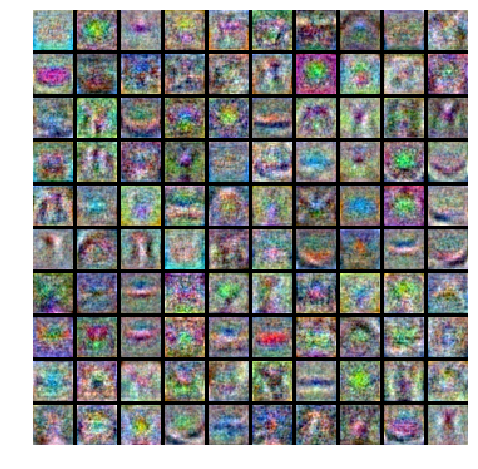

In [53]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [54]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.52
